In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Student_performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [4]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X

array([[99,  9,  1, 91],
       [82,  4,  2, 65],
       [51,  7,  2, 45],
       ...,
       [60,  6,  1, 38],
       [66,  8,  7, 60],
       [66,  4,  6, 45]], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train)
X_test = sc_X.fit_transform(X_test)
print(X_test)

[[ 0.89054118  0.83558004  0.52622211  1.33867786]
 [ 0.89054118  0.83558004 -1.57733075  0.2599669 ]
 [-0.39293157 -1.50404407  0.17562997 -0.71600969]
 ...
 [ 1.47393788  1.42048607  0.87681426  0.92774035]
 [-1.09300761  1.42048607  0.52622211 -1.22968158]
 [-0.9179886   1.42048607  0.87681426  0.10586533]]
[[-0.35589393  0.96011719  1.37076319 -0.66809402]
 [ 0.3343246   0.96011719 -0.134724   -0.30944834]
 [ 0.44936102  0.36089511 -1.64021118  0.35660792]
 [ 0.96702491 -0.23832696  1.74713499  1.22760456]
 [-1.21866708  0.96011719 -1.26383939 -0.51438873]
 [-0.70100319 -0.83754903  1.37076319 -1.28291518]
 [-1.39122171 -0.83754903 -0.88746759 -1.18044498]
 [-0.47093035  0.96011719 -0.51109579 -1.12920989]
 [ 0.56439744  0.36089511  1.37076319  0.6640185 ]
 [ 1.13957954  0.96011719 -1.64021118  1.12513437]
 [ 1.02454312  0.96011719  0.99439139  0.76648869]
 [ 1.42717059  0.36089511 -0.88746759  1.43254495]
 [ 0.56439744 -0.83754903 -1.64021118  0.71525359]
 [ 1.42717059 -0.83754903

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 1, 5, 9, 9, 1, 4, 1, 3, 7, 1, 7, 6, 6, 2, 3, 7, 4, 3, 3, 7, 7,
       2, 3, 7, 2, 3, 5, 5, 5, 1, 2, 7, 3, 7, 3, 1, 4, 7, 3, 6, 3, 6, 9,
       3, 2, 9, 7, 7, 3, 2, 9, 3, 3, 3, 3, 2, 1, 3, 2, 9, 3, 1, 5, 7, 3,
       3, 7, 5, 1, 7, 3, 1, 5, 7, 7, 5, 1, 6, 6, 1, 9, 3, 5, 3, 6, 2, 2,
       1, 3, 7, 3, 9, 5, 5, 9, 5, 7, 9, 3, 3, 9, 3, 1, 3, 5, 3, 5, 7, 3,
       7, 5, 9, 1, 9, 3, 7, 7, 3, 7, 5, 5, 7, 3, 7, 7, 5, 2, 7, 5, 3, 1,
       5, 7, 1, 3, 3, 3, 2, 7, 3, 3, 3, 3, 7, 1, 1, 7, 1, 7, 7, 8, 5, 7,
       7, 9, 1, 1, 6, 9, 6, 5, 3, 3, 6, 7, 3, 2, 5, 6, 2, 2, 9, 9, 7, 3],
      dtype=int64)

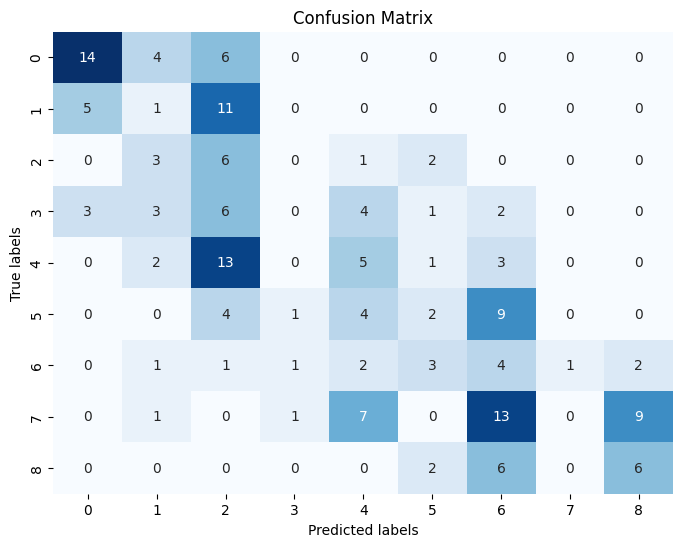

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Evaluation metrics for RBF Kernel:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Evaluation metrics for RBF Kernel:
Accuracy: 0.2159090909090909
Precision: 0.18951436666249402
Recall: 0.2159090909090909
F1-score: 0.19048834604938253
